# Домашнее задание 5

**Знакомство в компании**  
Представим, что процессы – это компания незнакомых людей, которые знакомятся с помощью следующей игры:  
1) Начинает процессор 0. Случайным образом он выбирает другой процессор i и посылает ему сообщение со своим именем (можете случайным образом задавать имя)  
2) Процессор i отсылает сообщение случайному процессору j (которые еще не участвовал в игре), в сообщении – все имена и ранги предыдущих процессоров в правильном порядке. Номер процессора j знает только i, так что все должны быть начеку.  
3) Игра заканчивается через N ходов. Используйте синхронную пересылку MPI_SSend  

Код: `hw5_1.c`  
Имена процессов имеют вид: `ps: ${process_rank}, hash: ${random_hash}`  
Для запуска использовал команду:  
```/usr/bin/mpicc  hw5_1.c -o hw5_1; /usr/bin/mpirun -np 4 ./hw5_1```:  

<pre>base) <font color="#26A269"><b>alex@alex-pc</b></font>:<font color="#12488B"><b>~/project/made/3_sem/HPC/HW5</b></font>$ /usr/bin/mpicc  hw5_1.c -o hw5_1; /usr/bin/mpirun -np 4 ./hw5_1
[Process 0]: process name: ps: 0, hash: NWLRBBM
[Process 0]: Send name from 0 to 1
[Process 2]: process name: ps: 2, hash: HXKOVZD
[Process 3]: process name: ps: 3, hash: FJYJERM
[Process 1]: process name: ps: 1, hash: EBGNHAM
[Process 1]: received msg: &apos;ps: 0, hash: NWLRBBM&apos; from process 0
[Process 1]: received 2 process names from process 0
[Process 1] 0: ps: 0, hash: NWLRBBM
[Process 1] 1: ps: 1, hash: EBGNHAM &lt;---current process 
[Process 1] 2:  &lt;&lt;Not recieved yet&gt;&gt;
[Process 1] 3:  &lt;&lt;Not recieved yet&gt;&gt;
[Process 1]: sendding process name to 2

[Process 1]: sendding array of names name to 2

[Process 2]: received msg: &apos;ps: 1, hash: EBGNHAM&apos; from process 1
[Process 2]: received 3 process names from process 1
[Process 2] 0: ps: 0, hash: NWLRBBM
[Process 2] 1: ps: 1, hash: EBGNHAM
[Process 2] 2: ps: 2, hash: HXKOVZD &lt;---current process 
[Process 2] 3:  &lt;&lt;Not recieved yet&gt;&gt;
[Process 2]: sendding process name to 3
[Process 3]: received msg: &apos;ps: 2, hash: HXKOVZD&apos; from process 2
[Process 3]: received 4 process names from process 2
[Process 3] 0: ps: 0, hash: NWLRBBM
[Process 3] 1: ps: 1, hash: EBGNHAM
[Process 3] 2: ps: 2, hash: HXKOVZD
[Process 2]: sendding array of names name to 3

[Process 3] 3: ps: 3, hash: FJYJERM &lt;---current process 

============================================================
[Process 3]: all process names were received
Proccess 0: ps: 0, hash: NWLRBBM 
Proccess 1: ps: 1, hash: EBGNHAM 
Proccess 2: ps: 2, hash: HXKOVZD 
Proccess 3: ps: 3, hash: FJYJERM 
</pre>

**Параллельный одномерный клеточный автомат.**  
С помощью MPI распараллельте одномерный клеточный автомат Вольфрама (Rule110).  
Игра происходит следующим образом:  
1) Инициализируйте одномерный массив 0 и 1 случайным образом  
2) В зависимости от значений: левого соседа, себя, правого соседа на следующем шаге клетка либо меняет значение, либо остается той же. Посмотрите, например, что значит Rule110 (https://en.wikipedia.org/wiki/Rule_110)  

Код для периодических граничных условий: `./part_2/hw5_2.c`  
Код для непериодических граничных условий: `./part_2/hw5_2_unperiodic.c`  
Доступные аргументы:
```Args:
-ht, --height: int - height of rendered area (iterations num), default 50
-w, --width: int - width of rendered area 60
-r, --rule: int - rule of cellular automaton 110
-s, --stat_only: flag - print only time without rendering picture```  
Примеры работы программы:  
- По умолчанию - rule 110:
![default rule 110](./part_2/default.png)
- Rule 122:
![rule 122](./part_2/r122.png)
- Rule 150:
![rule 150](./part_2/r150.png)

Для сбора статистики использовался скрипт ./part2/agg_stat.sh
Графики ниже:

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv("./part_2/stat.csv")
df = df[["cpu_num", "width", "time"]]
df.head()

,cpu_num,width,time
0,1,1000,0.047621
1,1,1000,0.044384
2,1,1000,0.057914
3,1,1000,0.050159
4,1,1000,0.048546


In [60]:
aggDf = df.groupby(['cpu_num', 'width']).agg({"time":"mean"})
aggDf = aggDf.reset_index()
aggDf

,cpu_num,width,time
0,1,1000,0.048338
1,1,5000,0.217201
2,1,10000,0.434238
3,1,15000,0.649873
4,1,20000,0.871175
...,...,...,...
83,8,30000,0.363427
84,8,35000,0.485998
85,8,40000,0.481724
86,8,45000,0.514455


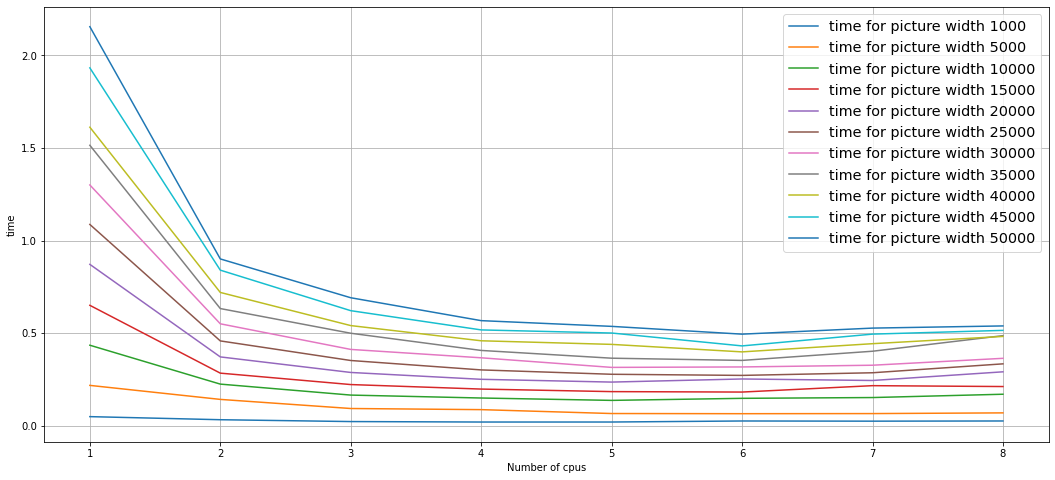

In [68]:
fig = plt.figure(figsize=(18, 8))
plt.xlabel('Number of cpus')
plt.ylabel('time')
    
for width in df.width.unique():
    curDf = aggDf.loc[aggDf["width"] == width]
    plt.plot(curDf['cpu_num'], curDf['time'], label='time for picture width {}'.format(width))

plt.legend(loc="upper right", fontsize="x-large")
plt.grid(True)
plt.show()    

К сожалению, так или иначе всё упирается в 0й процесс, который аагрегирует всю информацию на каждом шаге. Поэтому дальнейшее увеличение числа процессоров не дает серьезного выигрыша: все больше времени тратится на перессылку данных.